In [88]:
# import packages
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
warnings.filterwarnings('ignore')


In [2]:
# import data
data = pd.read_pickle('data/data_51.pkl')
data.head(2)

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,max_temp,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,ID_train_0,C,"[26.90909091, 27.20833333, 26.18333333, 24.7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5108181820000001, 0.535416667, 0.6145, 0.63...","[272.90275160000004, 104.565241, 167.1772247, ...","[0.800909091, 1.073333333, 1.5175, 1.4625, 0.5...","[87.77727273, 87.6525, 87.61416667, 87.6375, 8...",45.126304,27.208333,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,33.616667,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333


In [7]:
# name of columns
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
max_features = ["max_" + str(feat) for feat in features]
min_features = ["min_" + str(feat) for feat in features]
mean_features = ["mean_" + str(feat) for feat in features]
std_features = ["std_" + str(feat) for feat in features]
var_features = ["vat_" + str(feat) for feat in features]
median_features = ["median_" + str(feat) for feat in features]
ptp_features = ["ptp_" + str(feat) for feat in features]


<AxesSubplot:xlabel='target', ylabel='Count'>

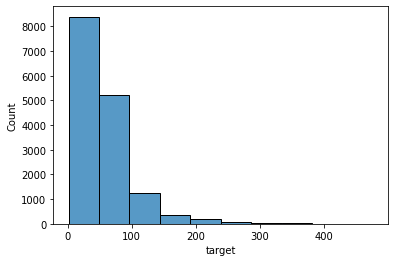

In [3]:
# overview of the target 
sns.histplot(data.target, bins=10)  # TODO bins passend zu der Klassifizierung



In [4]:
#data['target'], lmbda=boxcox(data['target'], lmbda=None)
data['target'].apply(np.log1p)

0        3.831383
1        4.383672
2        3.516349
3        4.004607
4        5.184133
           ...   
20569         NaN
20570         NaN
20571         NaN
20572         NaN
20573         NaN
Name: target, Length: 20574, dtype: float64

<AxesSubplot:xlabel='target', ylabel='Count'>

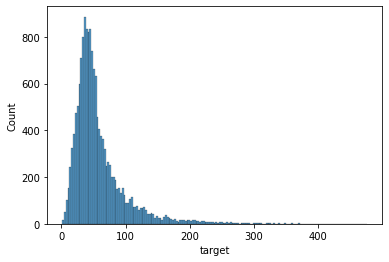

In [5]:
sns.histplot(data.target)


In [8]:
# null values
def print_null(df):
    total = df.isnull().sum().sort_values(ascending=False)
    total = total[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = total /df.shape[0]*100
    percent = percent[df.isnull().sum().sort_values(ascending=False) != 0]
    concat = pd.concat([total, percent])
    print (concat)

    
print_null(data.drop(features, axis=1))

target    5035.000000
target      24.472635
dtype: float64


In [ ]:
#sns.pairplot(data[mean_features])

#### EDA on precipitation

In [56]:
# EDA precipitation:
precip_stats = pd.concat([data.max_precip, 
                        data.min_precip, 
                        data.mean_precip, 
                        data.std_precip, 
                        data.var_precip, 
                        data.median_precip,  # all 0,0
                        data.ptp_precip],
                        axis=1)
precip_stats['r_std_precip'] = precip_stats['std_precip'] / precip_stats['mean_precip'] *100
data['sum_precip'] = data['precip'].apply(lambda x: np.sum(x))

<AxesSubplot:xlabel='mean_precip', ylabel='target'>

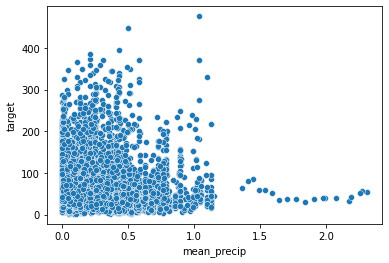

In [53]:
sns.scatterplot(data=data, x='mean_precip', y='target')

<AxesSubplot:xlabel='sum_precip', ylabel='target'>

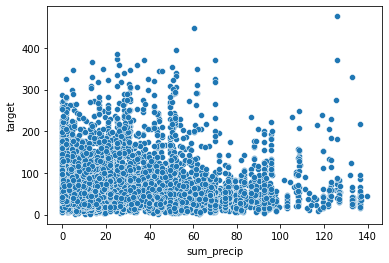

In [57]:
sns.scatterplot(data=data, x='sum_precip', y='target')

In [47]:
data.median_precip.unique()

array([0.])

In [10]:
data[['precip', 'std_precip','mean_precip']].head(2)



,precip,std_precip,mean_precip
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000
1,"[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...",0.051706,0.007025


In [11]:
precip_stats.median_precip.unique() #median values are all 0, why?

array([0.])

<AxesSubplot:xlabel='mean_precip', ylabel='Count'>

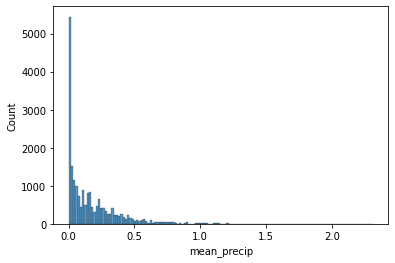

In [12]:
sns.histplot(precip_stats.mean_precip) # a lot of mean values == 0, when it doesnt rain

In [ ]:
"""def log1p(x):
    return np.log1p(x)

precip_stats['log_mean_precip'] = precip_stats['mean_precip'].apply(lambda x: log1p(X) for X in precip_stats.mean_precip )"""

<AxesSubplot:xlabel='r_std_precip', ylabel='Count'>

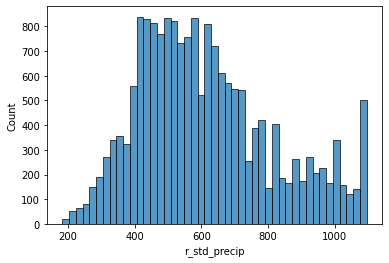

In [13]:
# relative Standard deviation of the precipitation
sns.histplot(precip_stats.r_std_precip)

In [14]:
precip_stats.r_std_precip.sort_values(ascending=False)[:3]

90      1095.445115
7371    1095.445115
7451    1095.445115
Name: r_std_precip, dtype: float64

In [51]:
precip_stats.values[3]

array([ 25.787     ,   0.        ,   1.12727273,   3.73988635,
        13.98674993,   0.        ,  25.787     , 331.76411197])

In [59]:

#np.std(data.precip[90])/
np.mean(data.precip[3])#*100

1.127272727272727

In [60]:
np.std(data.precip[3])

3.7398863530706783

The relative standard deviation is less than 15%, it should be ok

#### EDA on humidity 

In [19]:
# EDA humidity:
rel_hum_stats = pd.concat([data.max_rel_humidity, 
                        data.min_rel_humidity, 
                        data.mean_rel_humidity, 
                        data.std_rel_humidity, 
                        data.var_rel_humidity, 
                        data.median_rel_humidity,  # all 0
                        data.ptp_rel_humidity],
                        axis=1)
rel_hum_stats['r_std_rel_humidity'] = rel_hum_stats['std_rel_humidity'] / rel_hum_stats['mean_rel_humidity'] * 100


<AxesSubplot:xlabel='mean_rel_humidity', ylabel='Count'>

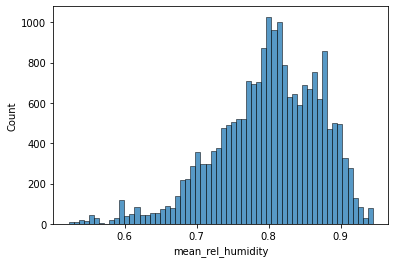

In [20]:
sns.histplot(rel_hum_stats.mean_rel_humidity) # a lot of mean values == 0, when it doesnt rain

<AxesSubplot:xlabel='r_std_rel_humidity', ylabel='Count'>

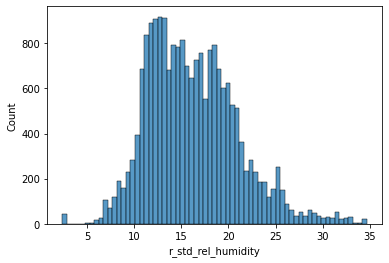

In [21]:
# relative Standard deviation of the precipitation
sns.histplot(rel_hum_stats.r_std_rel_humidity)

### EDA on wind speed

In [22]:
# EDA wind speed on metres per second:
wind_spd_stats = pd.concat([data.max_wind_spd, 
                        data.min_wind_spd, 
                        data.mean_wind_spd, 
                        data.std_wind_spd, 
                        data.var_wind_spd, 
                        data.median_wind_spd,  # all 0
                        data.ptp_wind_spd],
                        axis=1)
wind_spd_stats['r_std_wind_spd'] = wind_spd_stats['std_wind_spd'] / wind_spd_stats['mean_wind_spd'] * 100

<AxesSubplot:xlabel='mean_wind_spd', ylabel='Count'>

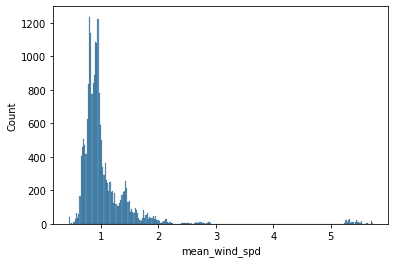

In [23]:
sns.histplot(wind_spd_stats.mean_wind_spd) # 5m/2 means Beafourt 3 -> leichte brise

<AxesSubplot:xlabel='r_std_wind_spd', ylabel='Count'>

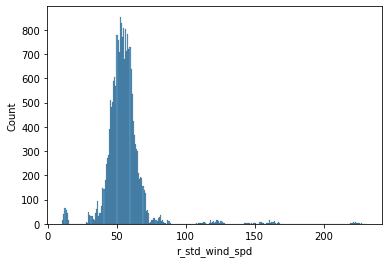

In [24]:
sns.histplot(wind_spd_stats.r_std_wind_spd)

#### atmos_press: mean atmospheric pressure(atm)*

[(87.5, 91.0)]

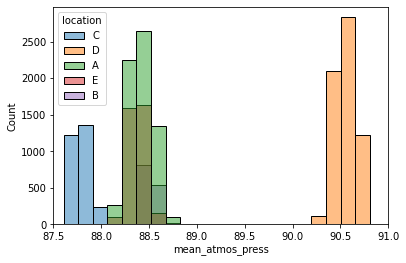

In [31]:
p = sns.histplot(data=data , x = 'mean_atmos_press', hue='location')
p.set(xlim=(87.5, 91))


[(87.5, 91.0)]

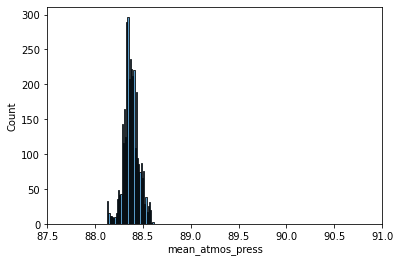

In [64]:
locations = ['A', 'B', 'C', 'D', 'E']

a = data[(data['location']=='E')]
ad= sns.histplot(a.mean_atmos_press)
ad.set(xlim=(87.5, 91))

mean_atmos_press depends on the location. 
?needs to level?

# Feature engineering

on data process

In [75]:
train_z = pd.read_pickle('data/train_process.pkl')
test_z = pd.read_pickle('data/test_process.pkl')

,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,...,newrel_humidity119,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120
0,ID_train_0,C,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_train_1,D,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,...,0.649250,73.528733,1.475833,90.439167,21.450000,0.561,0.797333,296.967254,1.019167,90.529167
2,ID_train_10,A,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,...,0.437917,NaN,NaN,88.415833,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_train_100,A,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,...,0.766417,NaN,NaN,88.490833,24.641667,0.000,0.719667,NaN,NaN,88.465833
4,ID_train_1000,A,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Log(1+x) Tranform target

In [76]:
train_z['log_target'] = train_z['target'].apply(np.log1p)

### One Hot encoder location

In [71]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# TODO

### original feature drop

in Zindi database is done

### export as csv


In [ ]:
train_z.to_csv('data/train_ours.csv')
test_z.to_csv('data/test_ours.csv')

## Basis Model

the prediction gives the mean value of the target

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [92]:
def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [85]:
# with zindi data:

# mean target
mean_target_zindi = train_z.target.mean()
y_target_zindi = [mean_target_zindi for x in range (train_z.target.shape[0])]

# with our data : 
#mean_target_our= train_z.log_target.mean()
mean_target_our = np.log1p(y_target_zindi)
y_target_our = [mean_target_our for x in range (train_z.target.shape[0])]

rmse_zindi = rmse(train_z.target, y_target_zindi)
rmse_our =   rmse(train_z.log_target, y_target_zindi)

print (f'RMSE for Zindi: {rmse_zindi:2f}')
print (f'RMSE for Our: {rmse_our:2f}') #54.354144

RMSE for Zindi: 42.372336
RMSE for Our: 54.354144


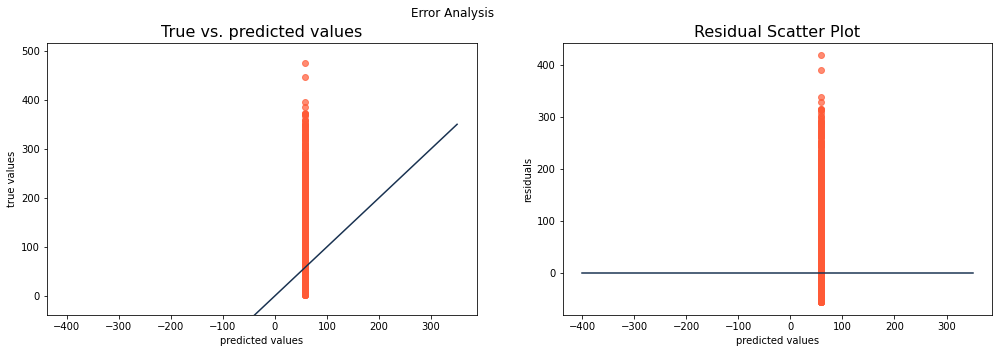

In [93]:
# error analysis 
error_analysis(train_z.target, y_target_zindi)

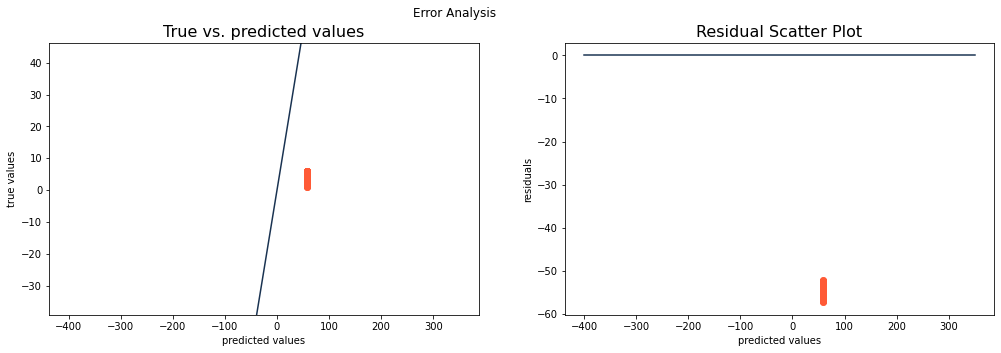

In [94]:
# error analysis in our data
error_analysis(train_z.log_target, y_target_zindi)

In [ ]:
X_train.info()

In [ ]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [ ]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

## Trainining the model

In [ ]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)